# EDA

# 1: Setup dan Read Data

In [29]:
# --- 1. Setup dan Pemuatan Data ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Mengatur gaya visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Muat dataset
try:
    df = pd.read_csv('cleaned.csv')
    print("Dataset berhasil dimuat.")
    print(f"Bentuk data: {df.shape[0]} baris, {df.shape[1]} kolom")
except FileNotFoundError:
    print("Error: File 'cleaned.csv' tidak ditemukan. Pastikan file berada di folder yang sama.")
    df = None

if df is not None:
    # Tampilkan 5 baris pertama
    print("\nData Awal:")
    display(df.head())
    
    # Tampilkan informasi umum tentang dataset
    print("\nInformasi Dataset:")
    df.info()

Dataset berhasil dimuat.
Bentuk data: 732 baris, 62 kolom

Data Awal:


,Judul Masakan,Waktu Masak,Tingkat Kesulitan,Jumlah Porsi,Bahan-bahan,URL Sumber,Bahan-bahan_cleaned,Bahan-bahan_cleaned_nostop,bahan-bahan_fix,Waktu Masak (menit),...,santan,seledri,serai,tahu,telur,tempe,tomat,udang,wijen,wortel
0,Resep Tempe Goreng Tepung Pedas Krispi yang Bi...,30mnt,Mudah,4 Porsi,"300 g tempe, iris tipis, 150 g tepung terigu, ...",https://www.masakapahariini.com/resep/resep-te...,"['g', 'tempe', 'iris', 'tipis', 'g', 'tepung',...","['tempe', 'tepung', 'terigu', 'tepung', 'maize...","bawang putih, bawang merah, kaldu ayam, cabai ...",30,...,0,0,0,0,0,1,0,0,0,0
1,"Resep Kikil Sapi Kuah Pedas Manis, Empuk, Keny...",2j 30mnt,Sedang,4 Porsi,500 g \t\t\t\ttunjang atau kikil y...,https://www.masakapahariini.com/resep/resep-ki...,"['g', 'tunjang', 'atau', 'kikil', 'yang', 'sud...","['tunjang', 'kikil', 'yang', 'sudah', 'dibersi...","bawang putih, bawang merah, kecap manis, cabai...",150,...,0,0,1,0,0,0,1,0,0,0
2,Resep Tempe Penyet Sambal Petis Sederhana ala ...,30mnt,Mudah,4 Porsi,"300 g tempe, potong tebal 2 cm, ½ sdm garam, 1...",https://www.masakapahariini.com/resep/resep-te...,"['g', 'tempe', 'potong', 'tebal', 'cm', 'sdm',...","['tempe', 'garam', 'ketumbar', 'santan', 'kela...","bawang putih, kecap manis, cabai merah, cabai ...",30,...,1,0,0,0,0,1,0,0,0,0
3,Resep Bakmi Jawa Jogja Goreng Enak dan Gampang...,1jam,Mudah,2 Porsi,"200 g mie basah, 150 g dada ayam fillet, poton...",https://www.masakapahariini.com/resep/resep-ba...,"['g', 'mie', 'basah', 'g', 'dada', 'ayam', 'fi...","['mie', 'basah', 'dada', 'ayam', 'telur', 'aya...","bawang putih, bawang merah, kecap manis, kaldu...",60,...,0,0,0,0,1,0,0,0,0,0
4,"Resep Sayur Asem Bening Sederhana ala Rumahan,...",45mnt,Mudah,4 Porsi,"1 buah \t\t\t\tjagung manis, poton...",https://www.masakapahariini.com/resep/resep-sa...,"['buah', 'jagung', 'manis', 'potong', 'bagian'...","['jagung', 'manis', 'labu', 'siam', 'melinjo',...","bawang merah, kaldu ayam, cabai merah, daun sa...",45,...,0,0,0,0,0,0,0,0,0,0



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 62 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Judul Masakan                732 non-null    object 
 1   Waktu Masak                  732 non-null    object 
 2   Tingkat Kesulitan            732 non-null    object 
 3   Jumlah Porsi                 732 non-null    object 
 4   Bahan-bahan                  732 non-null    object 
 5   URL Sumber                   732 non-null    object 
 6   Bahan-bahan_cleaned          732 non-null    object 
 7   Bahan-bahan_cleaned_nostop   732 non-null    object 
 8   bahan-bahan_fix              732 non-null    object 
 9   Waktu Masak (menit)          732 non-null    int64  
 10  Jumlah Porsi (int)           732 non-null    int64  
 11  Tingkat Kesulitan (ordinal)  726 non-null    float64
 12  bahan_list                   732 non-null    object 
 13  

# --- 2. EDA untuk Analisis Clustering ---


Ringkasan Statistik untuk Fitur Numerik:


,Waktu Masak (menit),Jumlah Porsi (int),Tingkat Kesulitan (ordinal)
count,732.000000,732.000000,726.000000
mean,63.383880,4.229508,1.369146
std,27.332505,1.643061,0.513365
min,0.000000,1.000000,1.000000
25%,45.000000,4.000000,1.000000
50%,60.000000,4.000000,1.000000
75%,70.000000,4.000000,2.000000
max,240.000000,25.000000,3.000000



Distribusi Fitur Numerik:


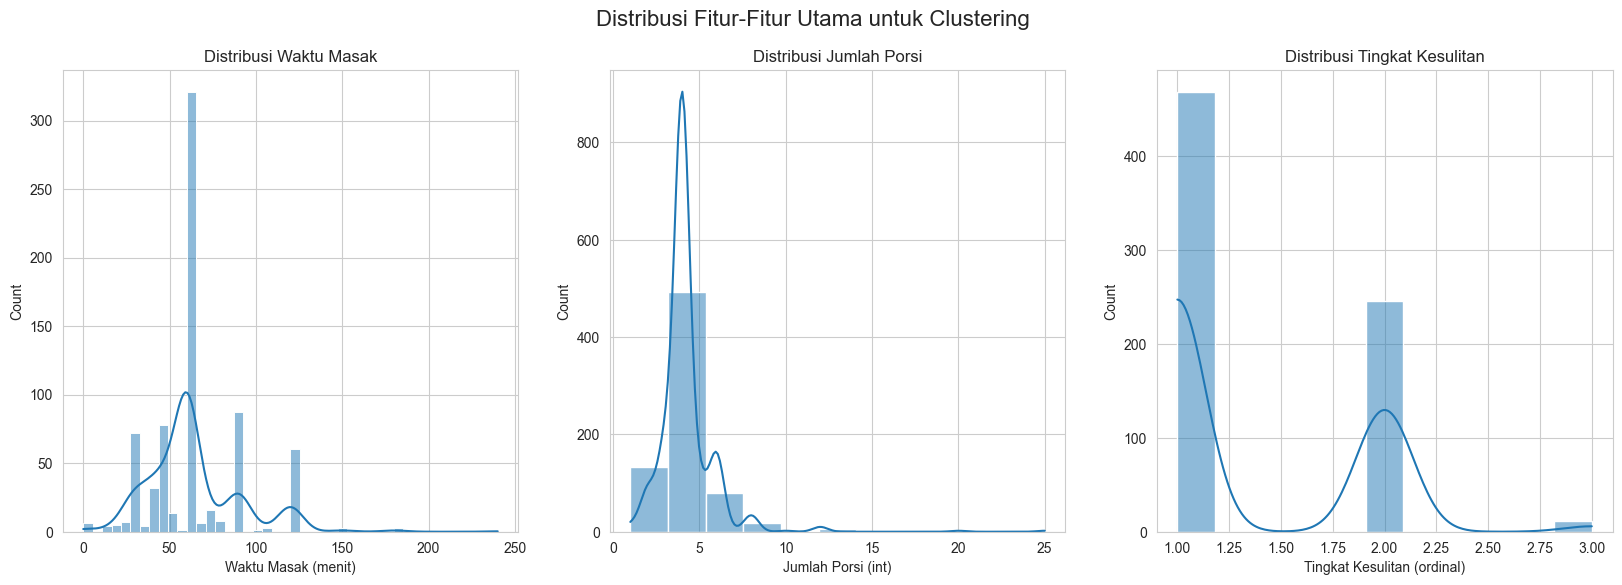


Matriks Korelasi antar Fitur Numerik:


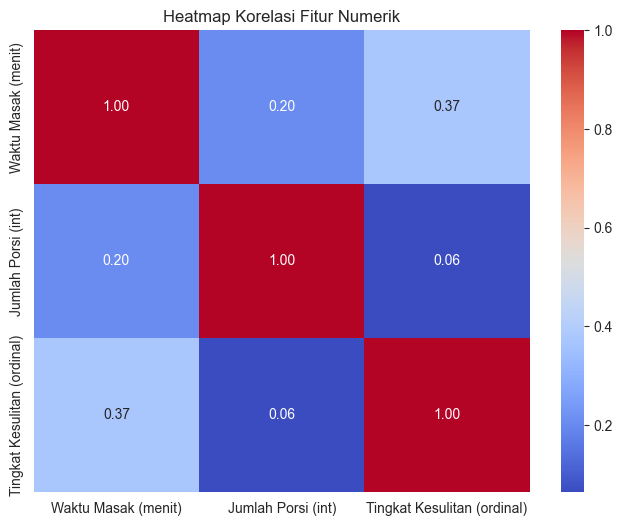

In [31]:
# Pilih kolom numerik non-encoding untuk dianalisis
kolom_numerik = ['Waktu Masak (menit)', 'Jumlah Porsi (int)', 'Tingkat Kesulitan (ordinal)']

# a. Ringkasan Statistik
print("\nRingkasan Statistik untuk Fitur Numerik:")
display(df[kolom_numerik].describe())

# b. Visualisasi Distribusi Fitur Numerik
print("\nDistribusi Fitur Numerik:")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribusi Fitur-Fitur Utama untuk Clustering', fontsize=16)

sns.histplot(df['Waktu Masak (menit)'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Waktu Masak')

sns.histplot(df['Jumlah Porsi (int)'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Jumlah Porsi')

sns.histplot(df['Tingkat Kesulitan (ordinal)'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Tingkat Kesulitan')

plt.show()

# c. Matriks Korelasi
print("\nMatriks Korelasi antar Fitur Numerik:")
plt.figure(figsize=(8, 6))
correlation_matrix = df[kolom_numerik].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# --- 3. EDA untuk Analisis Apriori ---


Berhasil mengidentifikasi 49 kolom bahan.

20 Bahan Paling Sering Digunakan:


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14240\3139772023.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frekuensi_bahan.head(20).values, y=frekuensi_bahan.head(20).index, palette='viridis')


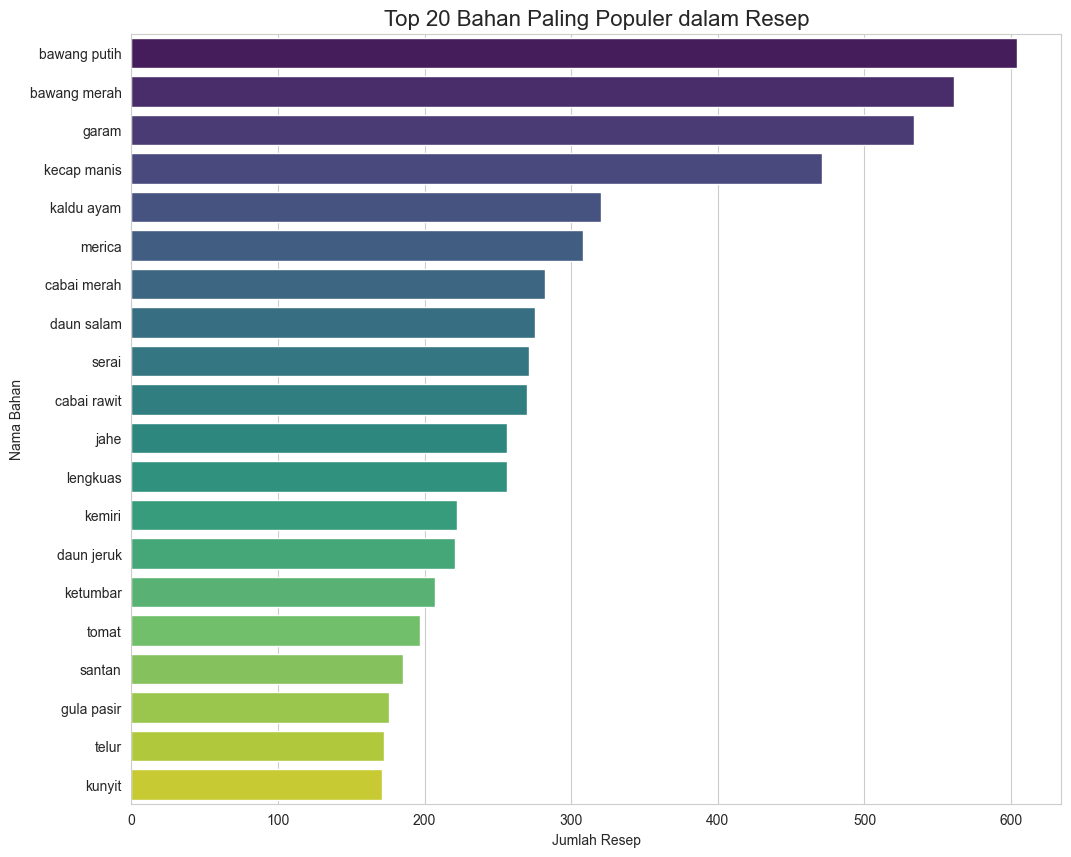


Analisis untuk Penentuan 'min_support':


,Persentase Kemunculan (%)
bawang putih,82.513661
bawang merah,76.639344
garam,72.950820
kecap manis,64.344262
kaldu ayam,43.715847
merica,42.076503
cabai merah,38.524590
daun salam,37.568306
serai,37.021858
cabai rawit,36.885246



SARAN: Bahan terpopuler ke-20 muncul di 23.36% resep.
Anda bisa memulai analisis Apriori dengan nilai min_support sekitar 0.234 atau sedikit lebih rendah.


In [32]:
# a. Identifikasi kolom bahan
try:
    # Cari indeks kolom 'asam jawa'
    start_col_index = df.columns.get_loc('asam jawa')
    # Pilih semua kolom dari 'asam jawa' sampai akhir
    kolom_bahan = df.columns[start_col_index:]
    print(f"\nBerhasil mengidentifikasi {len(kolom_bahan)} kolom bahan.")
except KeyError:
    print("Kolom 'asam jawa' tidak ditemukan. Silakan sesuaikan nama kolom.")
    kolom_bahan = []

if len(kolom_bahan) > 0:
    # b. Hitung Frekuensi Setiap Bahan
    frekuensi_bahan = df[kolom_bahan].sum().sort_values(ascending=False)
    
    # c. Visualisasi 20 Bahan Paling Populer
    print("\n20 Bahan Paling Sering Digunakan:")
    plt.figure(figsize=(12, 10))
    sns.barplot(x=frekuensi_bahan.head(20).values, y=frekuensi_bahan.head(20).index, palette='viridis')
    plt.title('Top 20 Bahan Paling Populer dalam Resep', fontsize=16)
    plt.xlabel('Jumlah Resep')
    plt.ylabel('Nama Bahan')
    plt.show()

    # d. Analisis untuk Menentukan min_support
    print("\nAnalisis untuk Penentuan 'min_support':")
    # Hitung persentase kemunculan untuk 20 bahan teratas
    persentase_kemunculan = (frekuensi_bahan.head(20) / len(df)) * 100
    display(persentase_kemunculan.to_frame(name='Persentase Kemunculan (%)'))
    
    min_support_saran = persentase_kemunculan.iloc[-1] / 100
    print(f"\nSARAN: Bahan terpopuler ke-20 muncul di {persentase_kemunculan.iloc[-1]:.2f}% resep.")
    print(f"Anda bisa memulai analisis Apriori dengan nilai min_support sekitar {min_support_saran:.3f} atau sedikit lebih rendah.")

# --- Langkah 1 & 2: Memuat dan Pra-pemrosesan Data ---

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

nama_file = 'data_resep_new_cleaned.csv'
try:
    df = pd.read_csv(nama_file)
except FileNotFoundError:
    print(f"Error: File '{nama_file}' tidak ditemukan.")
    exit()

df.dropna(subset=['bahan-bahan_fix'], inplace=True)
transactions = df['bahan-bahan_fix'].apply(lambda x: [item.strip() for item in x.split(',')])
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)



# --- Langkah 3: Menjalankan Algoritma Apriori ---

In [ ]:
min_support_val = 0.1
frequent_itemsets = apriori(df_onehot, min_support=min_support_val, use_colnames=True)
print(f"Menjalankan Apriori dengan min_support = {min_support_val}")
print(f"Total itemset yang ditemukan: {len(frequent_itemsets)}\n")


Menjalankan Apriori dengan min_support = 0.1
Total itemset yang ditemukan: 1156



# --- Langkah 4: Membuat Aturan Asosiasi ---

In [22]:
min_confidence_val = 0.7
if not frequent_itemsets.empty:
    all_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence_val)
    print(f"Menghasilkan {len(all_rules)} aturan awal dengan min_confidence = {min_confidence_val}\n")
else:
    all_rules = pd.DataFrame() # Buat dataframe kosong jika tidak ada itemset

Menghasilkan 2930 aturan awal dengan min_confidence = 0.7



# --- Langkah 5: FILTER dan Tampilkan Hasil yang Paling Berguna ---

In [23]:
if not all_rules.empty:
    # Filter 1: Ambil aturan yang memiliki kekuatan hubungan signifikan (Lift > 1.5)
    filtered_rules = all_rules[all_rules['lift'] > 2]
    print(f"Setelah filter 'lift > 2', tersisa {len(filtered_rules)} aturan.")

    # Filter 2: Ambil aturan yang sederhana agar mudah diinterpretasi
    # Contoh: kita ingin aturan dengan maksimal 2 bahan di sisi 'JIKA' (antecedents)
    # dan 1 bahan di sisi 'MAKA' (consequents)
    filtered_rules['antecedent_len'] = filtered_rules['antecedents'].apply(lambda x: len(x))
    filtered_rules['consequent_len'] = filtered_rules['consequents'].apply(lambda x: len(x))
    
    # Menerapkan filter kompleksitas
    simple_rules = filtered_rules[
        (filtered_rules['antecedent_len'] <= 3) & 
        (filtered_rules['consequent_len'] <= 1)
    ]
    print(f"Setelah filter kompleksitas (maks 3 antecedents, 1 consequent), tersisa {len(simple_rules)} aturan.")
    
    print("\n--- HASIL AKHIR: ATURAN ASOSIASI YANG SIGNIFIKAN DAN SEDERHANA ---")
    if not simple_rules.empty:
        # Mengurutkan hasil berdasarkan Lift dan Confidence
        final_rules = simple_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
        
        # Membersihkan tampilan output
        final_rules['antecedents'] = final_rules['antecedents'].apply(lambda a: ', '.join(list(a)))
        final_rules['consequents'] = final_rules['consequents'].apply(lambda a: ', '.join(list(a)))
        output_df = final_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
        
        pd.set_option('display.max_rows', 100)
        print(output_df.head(20)) # Menampilkan 20 aturan terbaik
    else:
        print("Tidak ditemukan aturan yang sederhana dan signifikan dengan filter saat ini.")
        print("Coba longgarkan filter (misal: turunkan lift, atau izinkan lebih banyak item).")
else:
    print("Tidak ada aturan yang bisa dibuat. Coba turunkan nilai `min_support` pada Apriori.")

Setelah filter 'lift > 2', tersisa 604 aturan.
Setelah filter kompleksitas (maks 3 antecedents, 1 consequent), tersisa 201 aturan.

--- HASIL AKHIR: ATURAN ASOSIASI YANG SIGNIFIKAN DAN SEDERHANA ---
                               antecedents consequents   support  confidence  \
1773               jahe, serai, daun jeruk      kunyit  0.105191    0.726415   
1798           daun salam, serai, ketumbar      kemiri  0.101093    0.831461   
1799             daun salam, serai, kemiri    ketumbar  0.101093    0.740000   
1196    bawang merah, daun salam, ketumbar      kemiri  0.118852    0.776786   
563                   daun salam, ketumbar      kemiri  0.120219    0.771930   
1772              jahe, kunyit, daun jeruk       serai  0.105191    0.939024   
1551    bawang putih, daun salam, ketumbar      kemiri  0.116120    0.765766   
1499      bawang putih, kunyit, daun jeruk       serai  0.125683    0.920000   
1387         bawang merah, serai, ketumbar      kemiri  0.114754    0.750000   
1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14240\278244826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules['antecedent_len'] = filtered_rules['antecedents'].apply(lambda x: len(x))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14240\278244826.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules['consequent_len'] = filtered_rules['consequents'].apply(lambda x: len(x))


# --- Langkah 6: Membuat File JSON Aturan ---

In [19]:
import json

# Membuat dict dengan format "antecedents": "consequents"
rules_dict = {
    row['antecedents']: row['consequents']
    for _, row in final_rules.iterrows()
}

with open("aturan_asosiasi_dict.json", "w", encoding="utf-8") as f:
    json.dump(rules_dict, f, ensure_ascii=False, indent=2)


# --- Langkah 7: FILTER dan Tampilkan Hasil yang Paling Berguna ---

In [21]:
final_rules.to_csv('hasil_aturan_asosiasi.csv', index=False)